**3. Voting**
---

In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [2]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
sonar = loadmat('Datasets.mat/Sonar_208x60_binary.mat')

df = pd.DataFrame(sonar.get('X'))
df['y'] = sonar.get('y').ravel()

In [5]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
72,0.0208,0.0186,0.0131,0.0211,0.0610,0.0613,0.0612,0.0506,0.0989,0.1093,...,0.0074,0.0063,0.0081,0.0087,0.0044,0.0028,0.0019,0.0049,0.0023,1
188,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,...,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018,2
90,0.0126,0.0519,0.0621,0.0518,0.1072,0.2587,0.2304,0.2067,0.3416,0.4284,...,0.0208,0.0048,0.0199,0.0126,0.0022,0.0037,0.0034,0.0114,0.0077,1
24,0.0293,0.0644,0.0390,0.0173,0.0476,0.0816,0.0993,0.0315,0.0736,0.0860,...,0.0035,0.0052,0.0083,0.0078,0.0075,0.0105,0.0160,0.0095,0.0011,1
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 72 to 41
Data columns (total 61 columns):
0     166 non-null float64
1     166 non-null float64
2     166 non-null float64
3     166 non-null float64
4     166 non-null float64
5     166 non-null float64
6     166 non-null float64
7     166 non-null float64
8     166 non-null float64
9     166 non-null float64
10    166 non-null float64
11    166 non-null float64
12    166 non-null float64
13    166 non-null float64
14    166 non-null float64
15    166 non-null float64
16    166 non-null float64
17    166 non-null float64
18    166 non-null float64
19    166 non-null float64
20    166 non-null float64
21    166 non-null float64
22    166 non-null float64
23    166 non-null float64
24    166 non-null float64
25    166 non-null float64
26    166 non-null float64
27    166 non-null float64
28    166 non-null float64
29    166 non-null float64
30    166 non-null float64
31    166 non-null float64
32    166 non-null float64
33  

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.028025,0.036473,0.040769,0.051508,0.071807,0.101895,0.121002,0.135070,0.179164,0.209880,...,0.013333,0.010704,0.011139,0.009104,0.008001,0.007472,0.007546,0.007568,0.006374,1.536145
std,0.021982,0.029464,0.032168,0.036830,0.046650,0.059001,0.062992,0.087953,0.124094,0.137876,...,0.009583,0.006814,0.007379,0.006882,0.005535,0.005458,0.006032,0.005720,0.004299,0.500201
min,0.001500,0.000600,0.002400,0.005800,0.007600,0.010200,0.003300,0.005700,0.007500,0.011300,...,0.000800,0.000500,0.001100,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,1.000000
25%,0.013025,0.015225,0.017250,0.024425,0.036775,0.067275,0.077150,0.078000,0.095675,0.115450,...,0.007450,0.005425,0.005625,0.004050,0.004200,0.003425,0.003500,0.003525,0.003100,1.000000
50%,0.021350,0.029700,0.032700,0.043650,0.062500,0.089650,0.104200,0.111800,0.146250,0.185000,...,0.011650,0.009850,0.009300,0.007250,0.006750,0.005700,0.005650,0.006050,0.005300,2.000000
75%,0.033575,0.046750,0.054500,0.062700,0.098450,0.126525,0.148775,0.168000,0.235900,0.269300,...,0.016375,0.014300,0.014475,0.012075,0.010100,0.009875,0.010100,0.009650,0.008500,2.000000
max,0.137100,0.157400,0.166500,0.173200,0.256500,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.037600,0.032600,0.031600,0.037700,0.036400,0.021800,2.000000


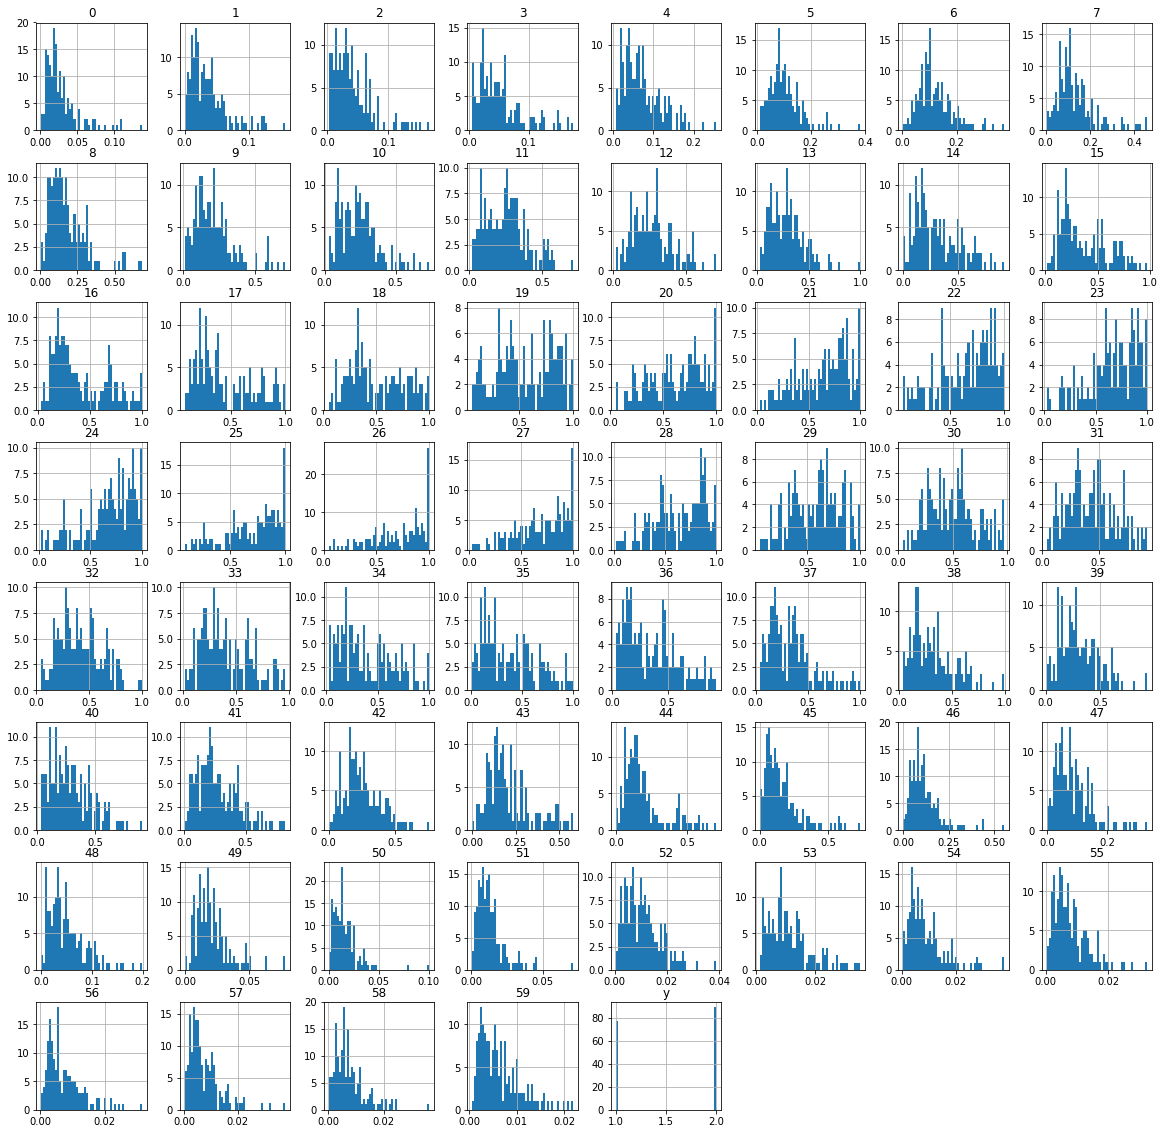

In [9]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

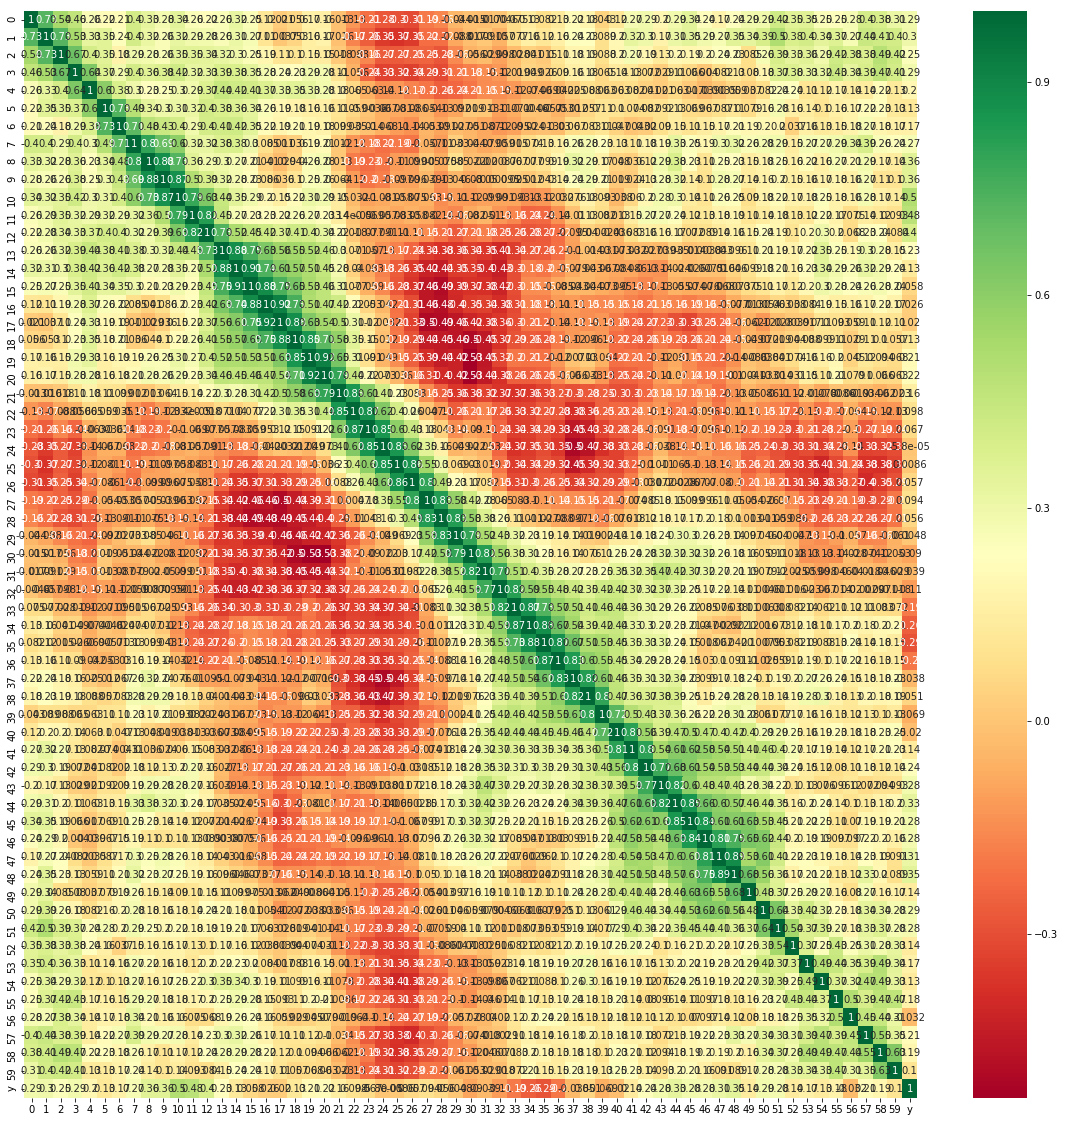

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [11]:
corrmat['y'].sort_values(ascending=True)

35   -0.291210
34   -0.260845
36   -0.200041
33   -0.193468
32   -0.108040
30   -0.089666
39   -0.069113
31   -0.038580
37   -0.037568
56   -0.031921
40   -0.019554
24   -0.000058
29    0.004755
25    0.008596
17    0.020174
16    0.025809
38    0.050597
28    0.055710
26    0.056885
15    0.057833
23    0.066917
27    0.093922
22    0.097596
59    0.104307
5     0.126004
18    0.126091
14    0.130012
54    0.133678
52    0.135273
41    0.137736
        ...   
21    0.155568
6     0.165416
53    0.167833
55    0.176974
58    0.192426
4     0.197941
19    0.206498
57    0.213677
20    0.216933
13    0.230088
42    0.244646
2     0.246953
7     0.270211
51    0.277405
46    0.281564
45    0.283924
43    0.284962
50    0.285294
3     0.285823
0     0.292906
1     0.297731
47    0.308256
44    0.332118
48    0.346280
9     0.357853
8     0.359580
12    0.395514
11    0.477745
10    0.501479
y     1.000000
Name: y, Length: 61, dtype: float64

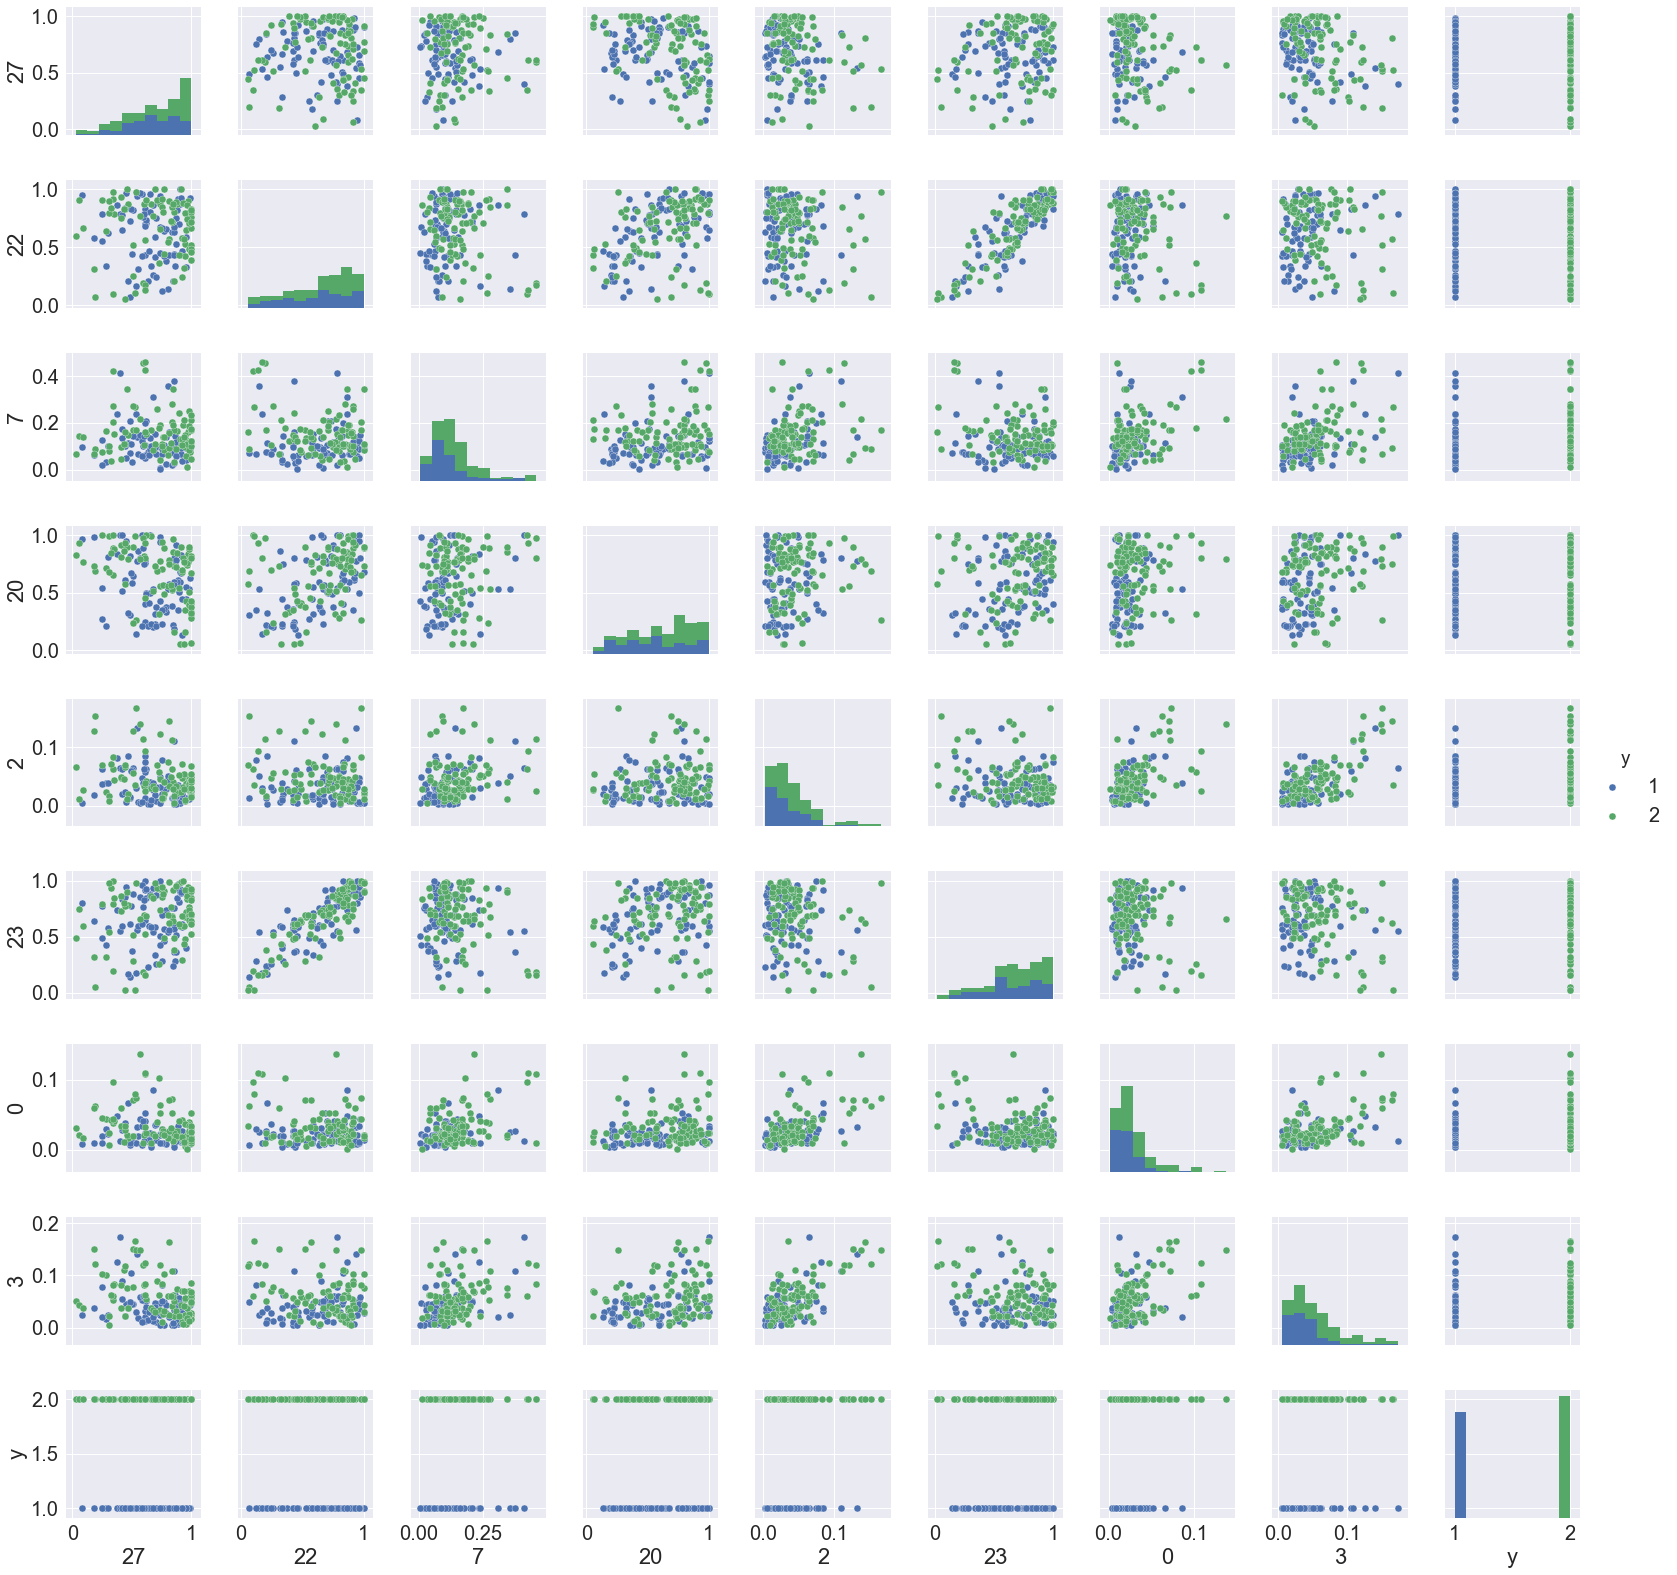

In [12]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df[[27,22, 7,20,2,23,0,3,'y']], hue='y')

In [13]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

2    0.536145
1    0.463855
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [14]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [15]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.687 (+/- 0.056)
The IQR is 0.086 between [0.65,0.73]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.63      0.81      0.70       770
         2.0       0.78      0.58      0.67       890

    accuracy                           0.69      1660
   macro avg       0.70      0.69      0.69      1660
weighted avg       0.71      0.69      0.68      1660

The average training time is 0.003132 seconds


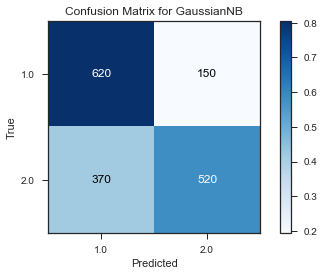

In [16]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), np.array(df['y']), classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.67
              precision    recall  f1-score   support

           1       0.70      0.64      0.67        22
           2       0.64      0.70      0.67        20

    accuracy                           0.67        42
   macro avg       0.67      0.67      0.67        42
weighted avg       0.67      0.67      0.67        42



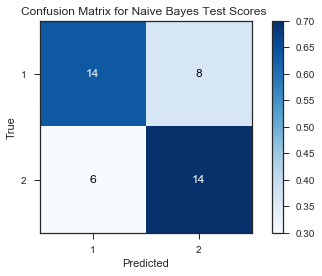

In [17]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.808 (+/- 0.097)
The IQR is 0.161 between [0.71,0.87]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.82      0.75      0.78       770
         2.0       0.80      0.85      0.83       890

    accuracy                           0.81      1660
   macro avg       0.81      0.80      0.80      1660
weighted avg       0.81      0.81      0.81      1660

The average training time is 0.004101 seconds


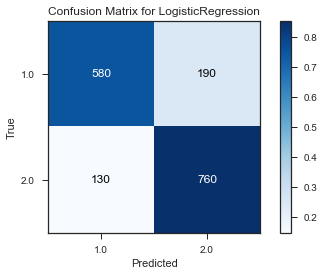

In [18]:
val_conf_LR, val_scores_LR, val_time_LR = classify(df.drop('y',axis=1), df['y'],
                                              classifiers['Logistic Regression'](solver='liblinear'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

The test accuracy is 0.64
              precision    recall  f1-score   support

           1       0.55      0.65      0.59        17
           2       0.73      0.64      0.68        25

    accuracy                           0.64        42
   macro avg       0.64      0.64      0.64        42
weighted avg       0.66      0.64      0.65        42



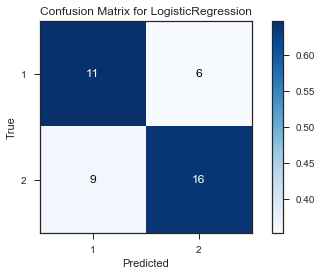

In [19]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear')
LR.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(df_test.drop('y',axis=1))
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.832 (+/- 0.088)
The IQR is 0.059 between [0.82,0.88]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.87      0.75      0.80       770
         2.0       0.81      0.90      0.85       890

    accuracy                           0.83      1660
   macro avg       0.84      0.83      0.83      1660
weighted avg       0.84      0.83      0.83      1660

The average training time is 0.831415 seconds


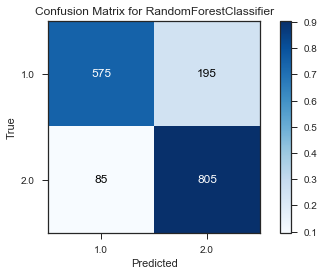

In [20]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],
                                                   classifiers['RF'](n_estimators = 500, n_jobs=-1))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 0.71
              precision    recall  f1-score   support

           1       0.65      0.72      0.68        18
           2       0.77      0.71      0.74        24

    accuracy                           0.71        42
   macro avg       0.71      0.72      0.71        42
weighted avg       0.72      0.71      0.72        42



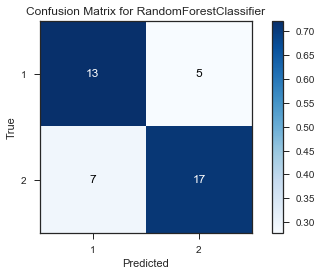

In [21]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500, n_jobs=-1)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.839 (+/- 0.099)
The IQR is 0.070 between [0.81,0.88]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.85      0.79      0.82       770
         2.0       0.83      0.88      0.85       890

    accuracy                           0.84      1660
   macro avg       0.84      0.83      0.84      1660
weighted avg       0.84      0.84      0.84      1660

The average training time is 0.627269 seconds


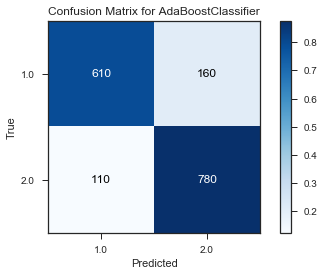

In [22]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), df['y'],
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 0.79
              precision    recall  f1-score   support

           1       0.80      0.76      0.78        21
           2       0.77      0.81      0.79        21

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.79      0.79      0.79        42



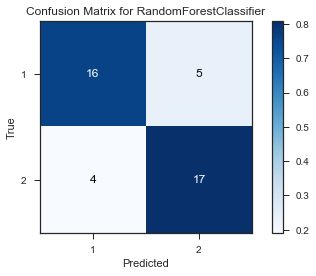

In [23]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, df_test['y']))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [24]:
np.shape(df['y'])

(166,)

The model score is 0.845 (+/- 0.066)
The IQR is 0.011 between [0.81,0.82]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.86      0.79      0.82       770
         2.0       0.83      0.89      0.86       890

    accuracy                           0.84      1660
   macro avg       0.85      0.84      0.84      1660
weighted avg       0.84      0.84      0.84      1660

The model score is 0.838 (+/- 0.084)
The IQR is 0.059 between [0.82,0.88]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.80      0.87      0.83       770
         2.0       0.88      0.81      0.84       890

    accuracy                           0.84      1660
   macro avg       0.84      0.84      0.84      1660
weighted avg       0.84      0.84      0.84      1660

The model score is 0.825 (+/- 0.101)
The IQR is 0.118 between [0.76,0.88]
There is 0 deleted rows
              precision    recall  f1-score   suppor

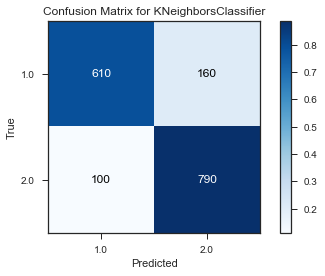

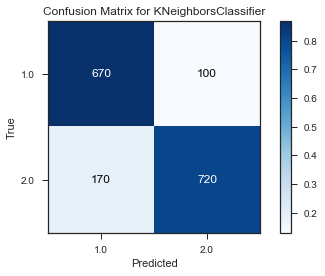

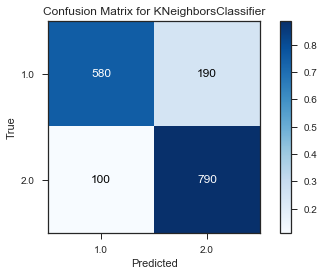

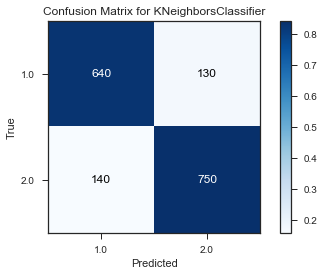

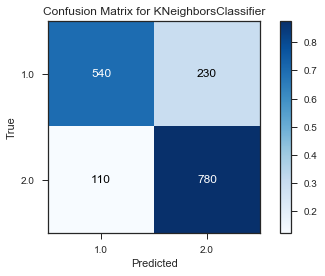

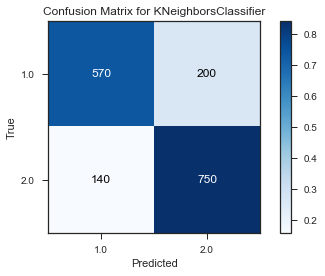

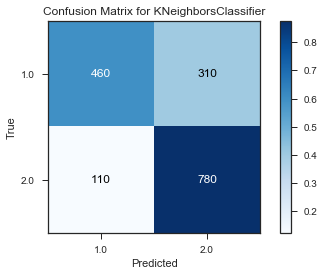

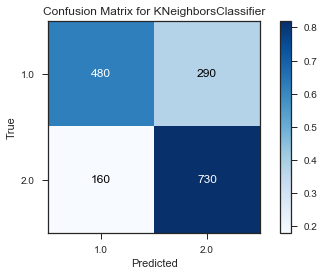

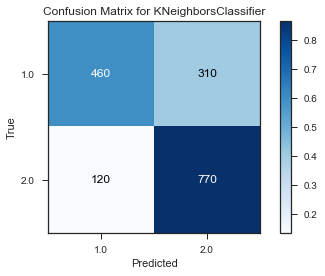

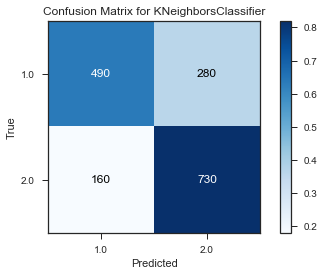

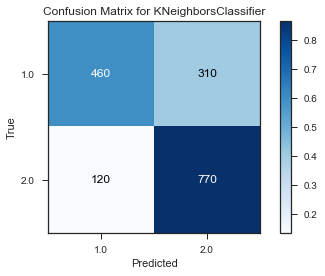

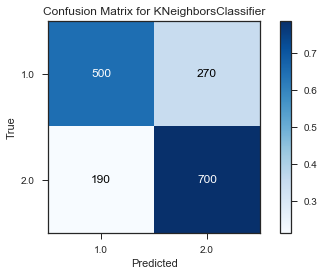

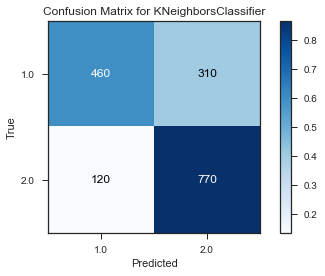

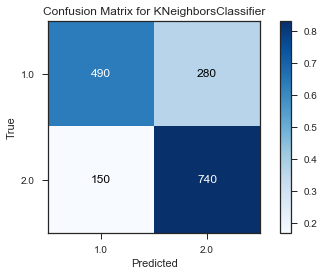

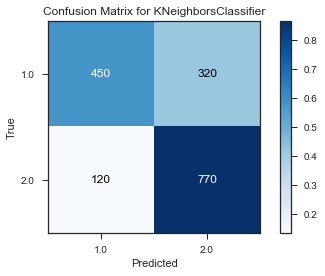

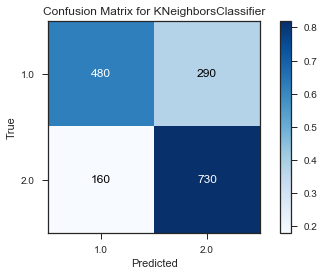

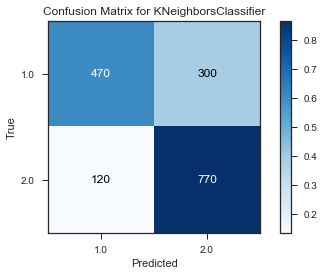

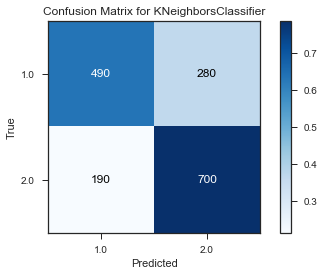

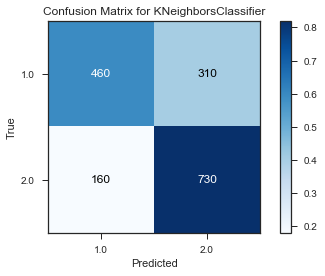

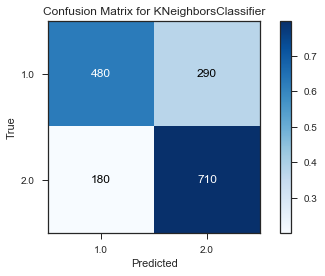

In [25]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

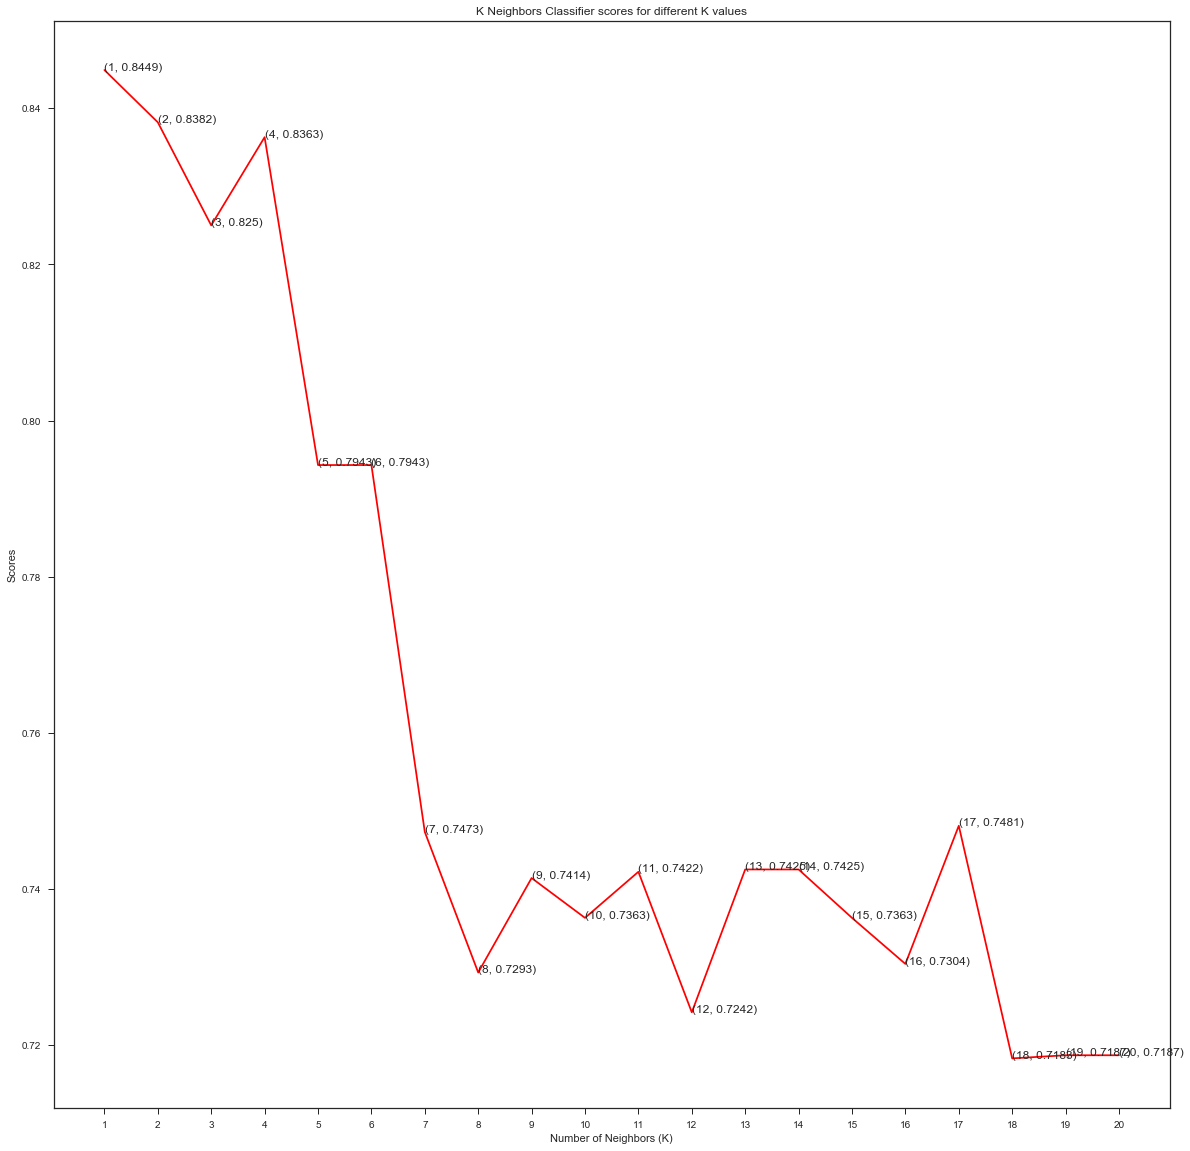

In [26]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.845 (+/- 0.066)
The IQR is 0.011 between [0.81,0.82]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.86      0.79      0.82       770
         2.0       0.83      0.89      0.86       890

    accuracy                           0.84      1660
   macro avg       0.85      0.84      0.84      1660
weighted avg       0.84      0.84      0.84      1660

The average training time is 0.003110 seconds


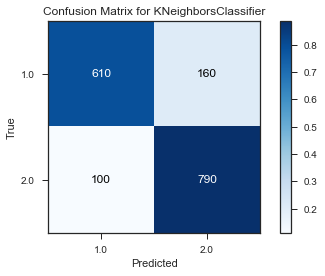

In [27]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

In [28]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.8810
              precision    recall  f1-score   support

           1       0.80      0.94      0.86        17
           2       0.95      0.84      0.89        25

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42



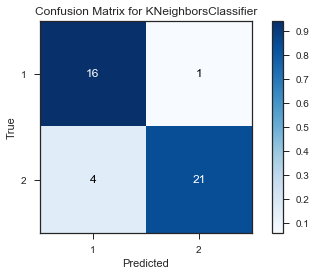

In [29]:
#  Fitting on the training data
KNN = classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [30]:
from time import time

In [31]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 41.909027 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.790 (+/- 0.058)
The IQR is 0.074 between [0.75,0.82]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.76      0.79      0.78       770
         2.0       0.81      0.79      0.80       890

    accuracy                           0.79      1660
   macro avg       0.79      0.79      0.79      1660
weighted avg       0.79      0.79      0.79      1660

The average training time is 0.005233 seconds


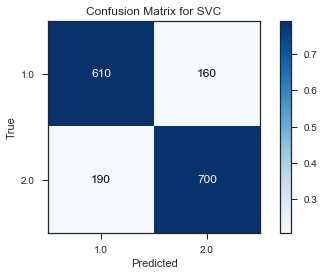

In [32]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C'],
                                                                        gamma = grid_search_L.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [33]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7650602409638554 {'C': 0.03125, 'gamma': 3.0517578125e-05}
0.7650602409638554 {'C': 0.03125, 'gamma': 6.103515625e-05}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.0001220703125}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.000244140625}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.00048828125}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.0009765625}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.001953125}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.00390625}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.0078125}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.015625}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.03125}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.0625}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.125}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.25}
0.7650602409638554 {'C': 0.03125, 'gamma': 0.5}
0.7650602409638554 {'C': 0.03125, 'gamma': 1.0}
0.7650602409638554 {'C': 0.03125, 'gamma': 2.0}
0.7650602409638554 {'C': 0.03125, 'gamma': 4.0}
0.7650602409638554 {'C': 0.03125,

The test accuracy is 0.7143
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        20
           2       0.73      0.73      0.73        22

    accuracy                           0.71        42
   macro avg       0.71      0.71      0.71        42
weighted avg       0.71      0.71      0.71        42



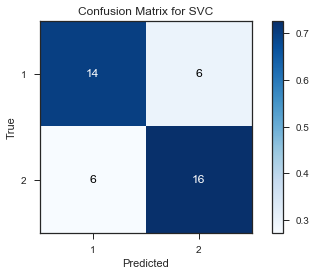

In [34]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'], 
                          gamma = grid_search_L.best_params_['gamma'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [35]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 24.991717 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.904 (+/- 0.047)
The IQR is 0.066 between [0.88,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.93      0.86      0.89       770
         2.0       0.88      0.94      0.91       890

    accuracy                           0.90      1660
   macro avg       0.91      0.90      0.90      1660
weighted avg       0.91      0.90      0.90      1660

The average training time is 0.007192 seconds


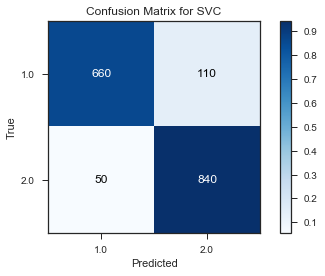

In [36]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 0.8810
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        19
           2       0.91      0.87      0.89        23

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



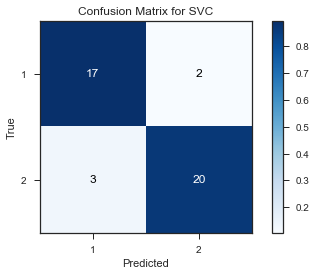

In [37]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

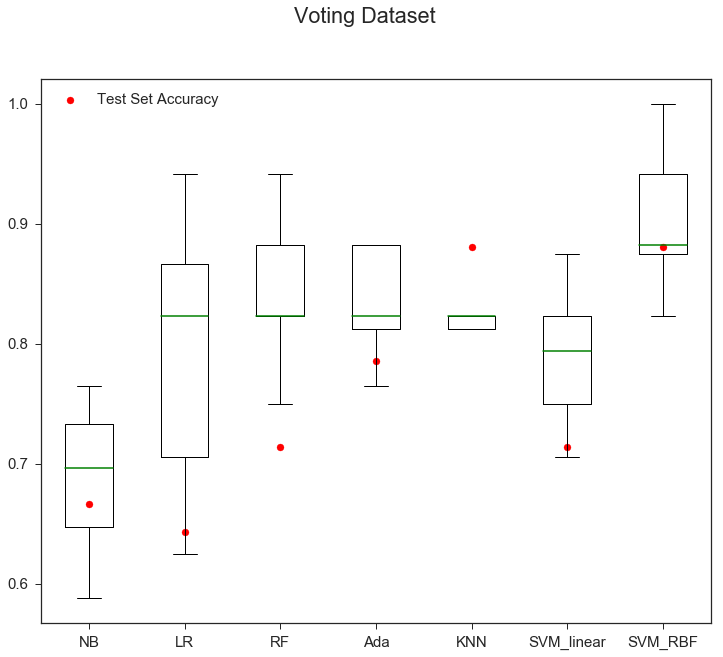

In [38]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,10))
fig.suptitle('Voting Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend()
plt.show()


In [39]:
test_results

[0.6666666666666666,
 0.6428571428571429,
 0.7142857142857143,
 0.7857142857142857,
 0.8809523809523809,
 0.7142857142857143,
 0.8809523809523809]